In [1]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Sebercheres/Machine_Learning_Final_Project/main/Dataset/water-potability.csv', index_col=0)

In [2]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


# Splitting the data


In [3]:
from sklearn.model_selection import train_test_split

X = df.drop('Potability', axis=1)
y = df['Potability']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, stratify=y, random_state=7)

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

## Data Distribution

In [5]:
import seaborn as sns
sns.set_theme(style="whitegrid")

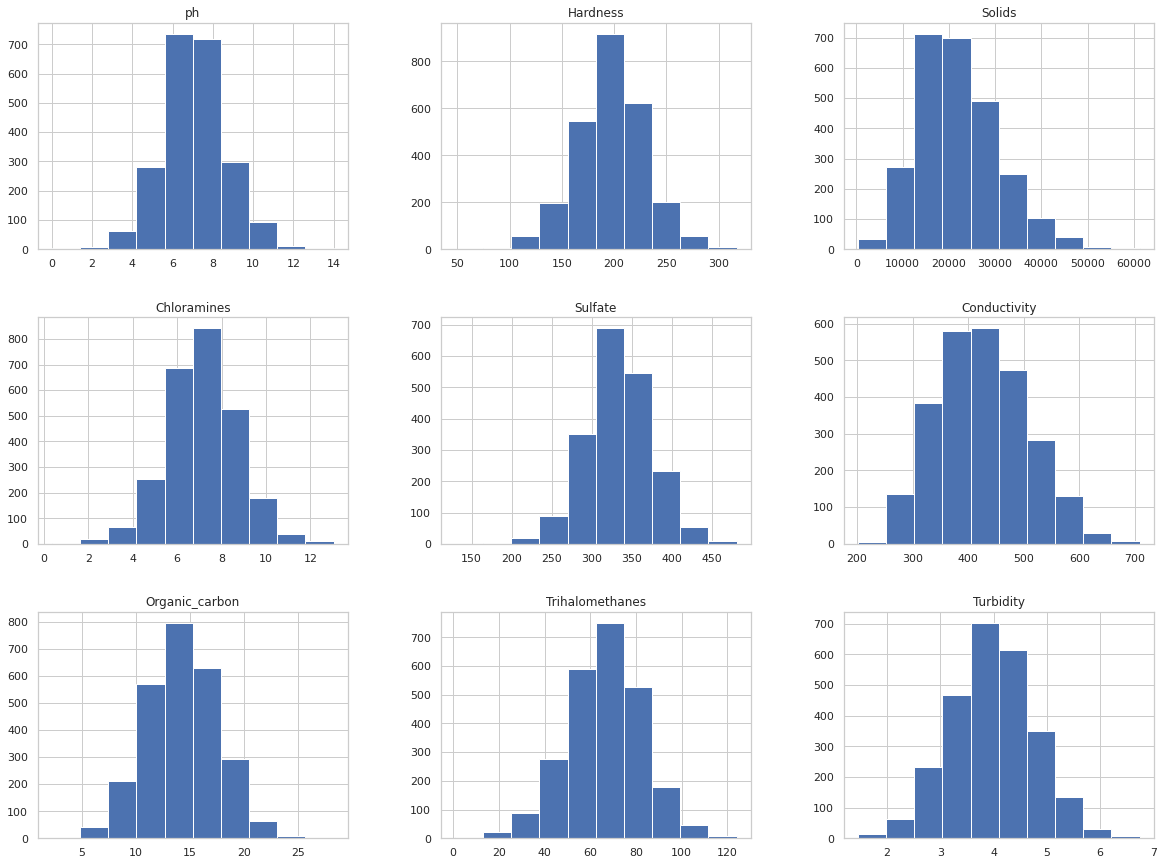

In [6]:
_ = X_train.hist(figsize=(20,15))

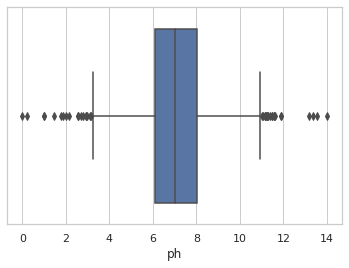

In [7]:
ax = sns.boxplot(x=X_train['ph'])

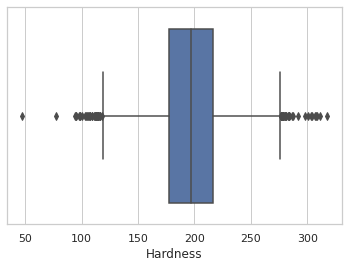

In [8]:
ax = sns.boxplot(x=X_train['Hardness'])

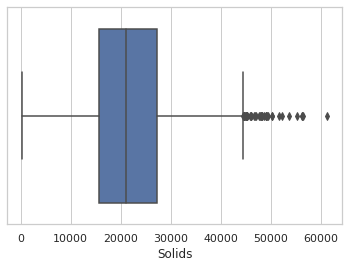

In [9]:
ax = sns.boxplot(x=X_train['Solids'])

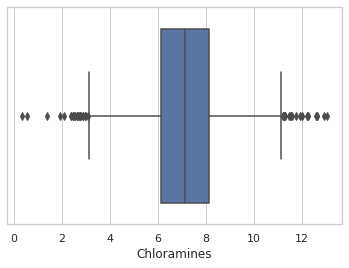

In [10]:
ax = sns.boxplot(x=X_train['Chloramines'])

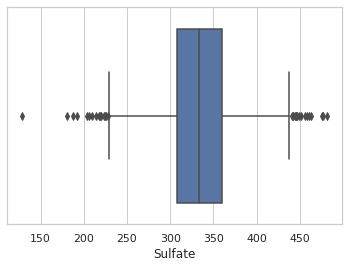

In [11]:
ax = sns.boxplot(x=X_train['Sulfate'])

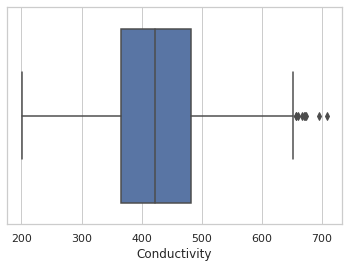

In [12]:
ax = sns.boxplot(x=X_train['Conductivity'])

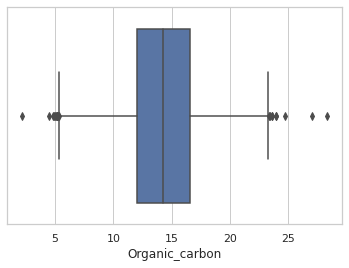

In [13]:
ax = sns.boxplot(x=X_train['Organic_carbon'])

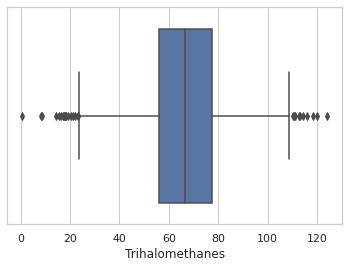

In [14]:
ax = sns.boxplot(x=X_train['Trihalomethanes'])

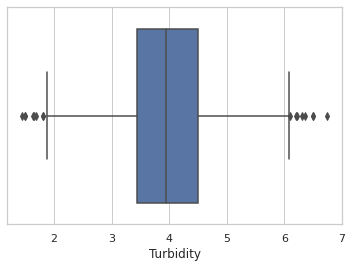

In [15]:
ax = sns.boxplot(x=X_train['Turbidity'])

## Data Correlation


In [16]:
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

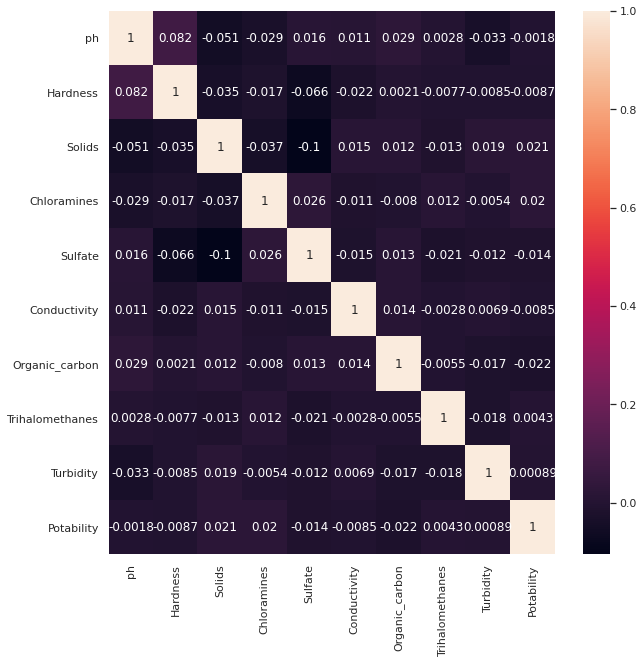

In [17]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(method='kendall'), annot=True)
plt.show()

In [36]:
def mean(x):
    return sum(x)/len(x)

def covariance(x,y):
    calc = []
    for i in range(len(x)):
        xi = x[i] - mean(x)
        yi = y[i] - mean(y)
        calc.append(xi * yi)
    return sum(calc)/(len(x) - 1)
    
a = [1,2,3,4,5] ; b = [5,4,3,2,1]
print(covariance(a,b))

-2.5


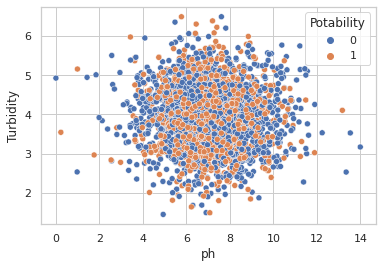

In [30]:
ax = sns.scatterplot(x="ph", y="Turbidity", hue=df.Potability,data=df)

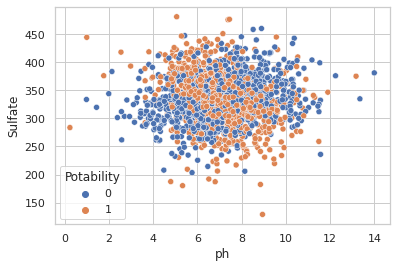

In [31]:
ax = sns.scatterplot(x="ph", y="Sulfate", hue=df.Potability,data=df)

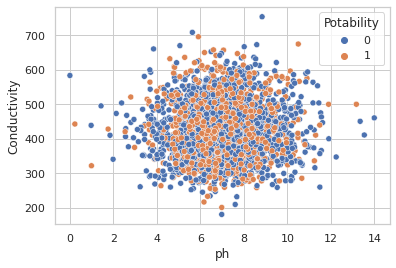

In [32]:
ax = sns.scatterplot(x="ph", y="Conductivity", hue=df.Potability,data=df)

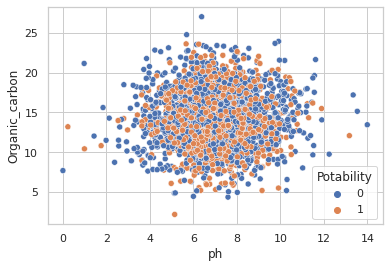

In [33]:
ax = sns.scatterplot(x="ph", y="Organic_carbon", hue=df.Potability,data=df)

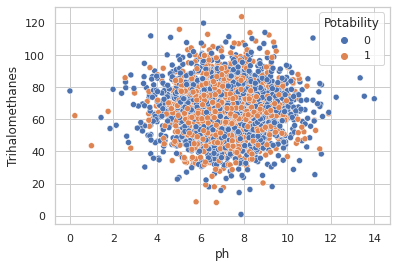

In [35]:
ax = sns.scatterplot(x="ph", y="Trihalomethanes", hue=df.Potability,data=df)

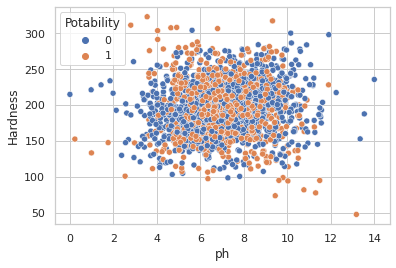

In [27]:
ax = sns.scatterplot(x="ph", y="Hardness", hue=df.Potability,data=df)

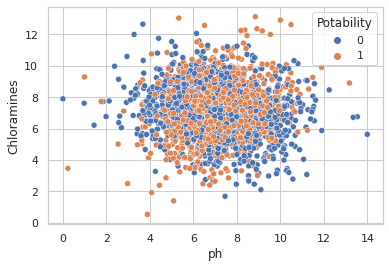

In [19]:
ax = sns.scatterplot(x="ph", y="Chloramines", hue=df.Potability,data=df)

In [20]:
df.corr().abs()['Potability'].sort_values(ascending = False)

Potability         1.000000
Solids             0.033743
Organic_carbon     0.030001
Chloramines        0.023779
Sulfate            0.023577
Hardness           0.013837
Conductivity       0.008128
Trihalomethanes    0.007130
ph                 0.003556
Turbidity          0.001581
Name: Potability, dtype: float64

## Identify missing value, outlier, anomaly, duplicates

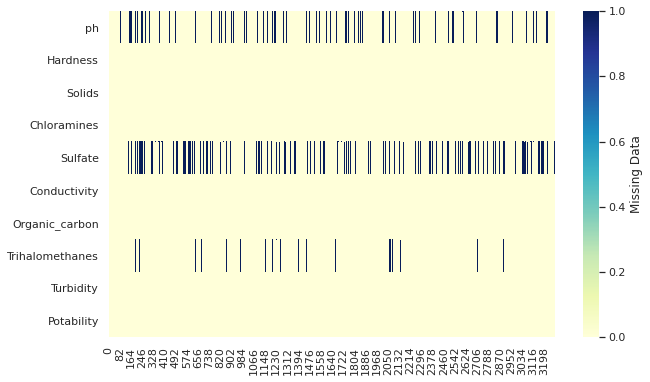

In [21]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

plt.show()

In [22]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [23]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [24]:
df[df['Potability']==0].describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,1684.000000,1998.000000,1998.000000,1998.000000,1510.000000,1998.000000,1998.000000,1891.000000,1998.000000,1998.0
mean,7.085378,196.733292,21777.490788,7.092175,334.564290,426.730454,14.364335,66.303555,3.965800,0.0
std,1.683499,31.057540,8543.068788,1.501045,36.745549,80.047317,3.334554,16.079320,0.780282,0.0
min,0.000000,98.452931,320.942611,1.683993,203.444521,181.483754,4.371899,0.738000,1.450000,0.0
25%,6.037723,177.823265,15663.057382,6.155640,311.264006,368.498530,12.101057,55.706530,3.444062,0.0
50%,7.035456,197.123423,20809.618280,7.090334,333.389426,422.229331,14.293508,66.542198,3.948076,0.0
75%,8.155510,216.120687,27006.249009,8.066462,356.853897,480.677198,16.649485,77.277704,4.496106,0.0
max,14.000000,304.235912,61227.196008,12.653362,460.107069,753.342620,28.300000,120.030077,6.739000,0.0


In [25]:
df[df['Potability']==1].describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,1101.000000,1278.000000,1278.000000,1278.000000,985.000000,1278.000000,1278.000000,1223.000000,1278.000000,1278.0
mean,7.073783,195.800744,22383.991018,7.169338,332.566990,425.383800,14.160893,66.539684,3.968328,1.0
std,1.448048,35.547041,9101.010208,1.702988,47.692818,82.048446,3.263907,16.327419,0.780842,0.0
min,0.227499,47.432000,728.750830,0.352000,129.000000,201.619737,2.200000,8.175876,1.492207,1.0
25%,6.179312,174.330531,15668.985035,6.094134,300.763772,360.939023,12.033897,56.014249,3.430909,1.0
50%,7.036752,196.632907,21199.386614,7.215163,331.838167,420.712729,14.162809,66.678214,3.958576,1.0
75%,7.933068,218.003420,27973.236446,8.199261,365.941346,484.155911,16.356245,77.380975,4.509569,1.0
max,13.175402,323.124000,56488.672413,13.127000,481.030642,695.369528,23.604298,124.000000,6.494249,1.0
